In [110]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


In [111]:
yolo = cv2.dnn.readNet("yolov3.weights", "yolov3.cfg")

In [112]:
classes = []

with open("coco.names", "r") as f:
    classes = f.read().splitlines()

In [113]:
classes

['person',
 'bicycle',
 'car',
 'motorbike',
 'aeroplane',
 'bus',
 'train',
 'truck',
 'boat',
 'traffic light',
 'fire hydrant',
 'stop sign',
 'parking meter',
 'bench',
 'bird',
 'cat',
 'dog',
 'horse',
 'sheep',
 'cow',
 'elephant',
 'bear',
 'zebra',
 'giraffe',
 'backpack',
 'umbrella',
 'handbag',
 'tie',
 'suitcase',
 'frisbee',
 'skis',
 'snowboard',
 'sports ball',
 'kite',
 'baseball bat',
 'baseball glove',
 'skateboard',
 'surfboard',
 'tennis racket',
 'bottle',
 'wine glass',
 'cup',
 'fork',
 'knife',
 'spoon',
 'bowl',
 'banana',
 'apple',
 'sandwich',
 'orange',
 'broccoli',
 'carrot',
 'hot dog',
 'pizza',
 'donut',
 'cake',
 'chair',
 'sofa',
 'pottedplant',
 'bed',
 'diningtable',
 'toilet',
 'tvmonitor',
 'laptop',
 'mouse',
 'remote',
 'keyboard',
 'cell phone',
 'microwave',
 'oven',
 'toaster',
 'sink',
 'refrigerator',
 'book',
 'clock',
 'vase',
 'scissors',
 'teddy bear',
 'hair drier',
 'toothbrush']

In [114]:
len(classes)

80

In [115]:
img = cv2.imread("/pexels-nikita-lutsenko-194759220-11454091.jpg")
blob = cv2.dnn.blobFromImage(img, 1/255, (416, 416), (0, 0, 0), swapRB = True, crop = False)

In [116]:
blob_size = blob.shape
reshape_dim = int(blob_size[1] ** 0.5)

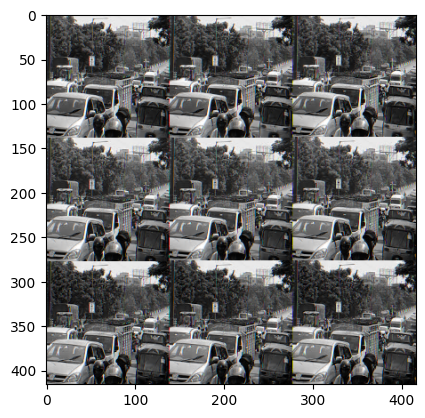

In [117]:
plt.imshow(cv2.cvtColor(i, cv2.COLOR_BGR2RGB))  # Convert BGR to RGB for Matplotlib
plt.show()

In [118]:
yolo.setInput(blob)

In [119]:
output_layers_names = yolo.getUnconnectedOutLayersNames()
layerOutputs = yolo.forward(output_layers_names)

In [120]:
boxs = []
confidences = []
class_ids = []
for output in layerOutputs:
    for detection in output:
      score = detection[5:]
      class_id = np.argmax(score)
      confidence = score[class_id]
      if confidence > 0.7:
        center_x = int(detection[0] *width)
        center_x = int(detection[0] *height)
        w = int(detection[2] *width)
        h = int(detection[3] *height)
        x = int(center_x - w/2)
        y = int(center_y - h/2)

        boxs.append([x, y, w, h])
        confidences.append(float(confidence))
        class_ids.append(class_id)

In [121]:
len(boxs)

0

In [122]:
indexes = cv2.dnn.NMSBoxes(boxs, confidences, 0.5, 0.4)

In [123]:
font = cv2.FONT_HERSHEY_PLAIN
colors = np.random.uniform(0, 255, size = (len(classes), 3 ))

Printng Image

In [124]:
indexes = np.array(indexes)

In [125]:
for i in indexes.flatten():
    x, y, w, h = boxs[i]
    label = str(classes[class_ids[i]])
    confidence = str(round(confidences[i], 2))
    color = colors[class_ids[i]]
    # Add a comma between (x,y) and (x+w, y+h)
    cv2.rectangle(img, (x,y), (x+w, y+h), color, i )
    cv2.putText(img, label + " " + confidence, (x, y + 20), font, 2, (255,255,255), 1)

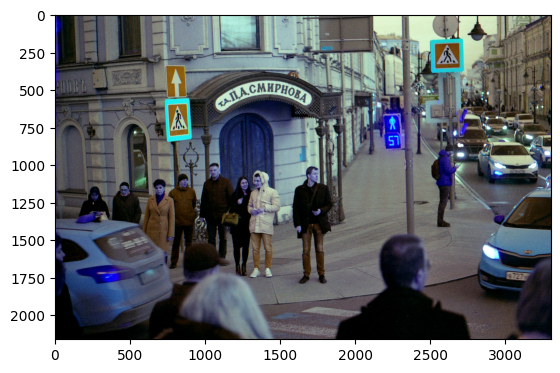

In [126]:
plt.imshow(img)

In [128]:
cv2.imwrite("/image.jpg", img)

True